<a href="https://colab.research.google.com/github/Panos1992/NetLoad_Optimization_residential/blob/main/LoadShift_Opt_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# Change to your desired directory
#desired_path = '/content/'
desired_path = '/content/drive/MyDrive/Housing_data'
os.chdir(desired_path)
# Verify the current working directory
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /content/drive/MyDrive/Housing_data


In [4]:
# Define the file path
#File = 'Data_Households_SmartPV'
#File = 'Average_household_energy'

#avg_energy_df = pd.read_csv('Average_household_energy.csv')
raw_df = pd.read_csv('Data_Households_SmartPV.csv')

raw_df['Timestamp'] = pd.to_datetime(raw_df['Timestamp'])
raw_df .info()
print(raw_df.head())  # This will print the first 5 rows of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187562 entries, 0 to 1187561
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Timestamp    1187562 non-null  datetime64[ns]
 1   NM_meter     1187562 non-null  int64         
 2   Import       1187562 non-null  float64       
 3   Export       1187562 non-null  float64       
 4   PV_meter     1187562 non-null  int64         
 5   Production   1187562 non-null  float64       
 6   Consumption  1187562 non-null  float64       
 7   NetLoad      1187562 non-null  float64       
 8   day          1187562 non-null  int64         
 9   day_of_week  1187562 non-null  int64         
 10  month        1187562 non-null  int64         
 11  year         1187562 non-null  int64         
 12  hour_of_day  1187562 non-null  int64         
 13  quarter      1187562 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 126.8 MB


# Data Pre-Processing:
Make the appropriate dataframes
and get the selected arrays

We can take average data or aggregated,
or even individual house, as case study




In [13]:
### Yearly Average Energy
#yearly_avg_df = raw_df.groupby(['Timestamp', 'month']).mean().reset_index()  # average
yearly_avg_df = raw_df.groupby(['Timestamp', 'month']).sum().reset_index()   #aggregate

yearly_avg_df.info()
yearly_avg_df.head()

### Monthly Avg
#monthly_df = raw_df.groupby(['month','PV_meter']).mean().reset_index()
monthly_df = raw_df.groupby(['month']).mean()
months_of_the_year = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#print(months_of_the_year)

### Daily Avg
hourly_df = raw_df.groupby(['hour_of_day']).mean()

### Weekday / Weekend Avg
#raw_df2 = raw_df
#raw_df2['day_type'] = raw_df2['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
#weekly_df = raw_df2.groupby(['quarter','day_type']).mean()
weekly_df = raw_df.groupby(['day_of_week']).mean()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week = ["weekday","weekend"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    17564 non-null  datetime64[ns]
 1   month        17564 non-null  int64         
 2   NM_meter     17564 non-null  int64         
 3   Import       17564 non-null  float64       
 4   Export       17564 non-null  float64       
 5   PV_meter     17564 non-null  int64         
 6   Production   17564 non-null  float64       
 7   Consumption  17564 non-null  float64       
 8   NetLoad      17564 non-null  float64       
 9   day          17564 non-null  int64         
 10  day_of_week  17564 non-null  int64         
 11  year         17564 non-null  int64         
 12  hour_of_day  17564 non-null  int64         
 13  quarter      17564 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 1.9 MB


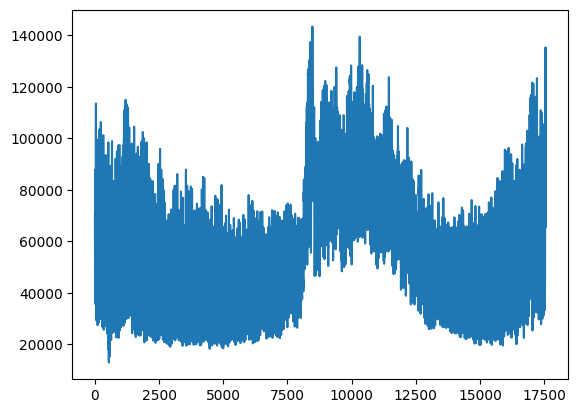

In [14]:
#### Aggregated Load data:
yearly_agr_df = raw_df.groupby(['Timestamp', 'month']).sum().reset_index()
#yearly_agr_df.info()
#yearly_agr_df.head()

hourly_agr_df = raw_df.groupby(['Timestamp', 'hour_of_day']).sum().reset_index()

#plt.plot(yearly_agr_df['Consumption'])
#plt.plot(yearly_agr_df['Production'])
#plt.plot(yearly_agr_df['NetLoad'])

plt.plot(hourly_agr_df['Consumption'])


PLOTS

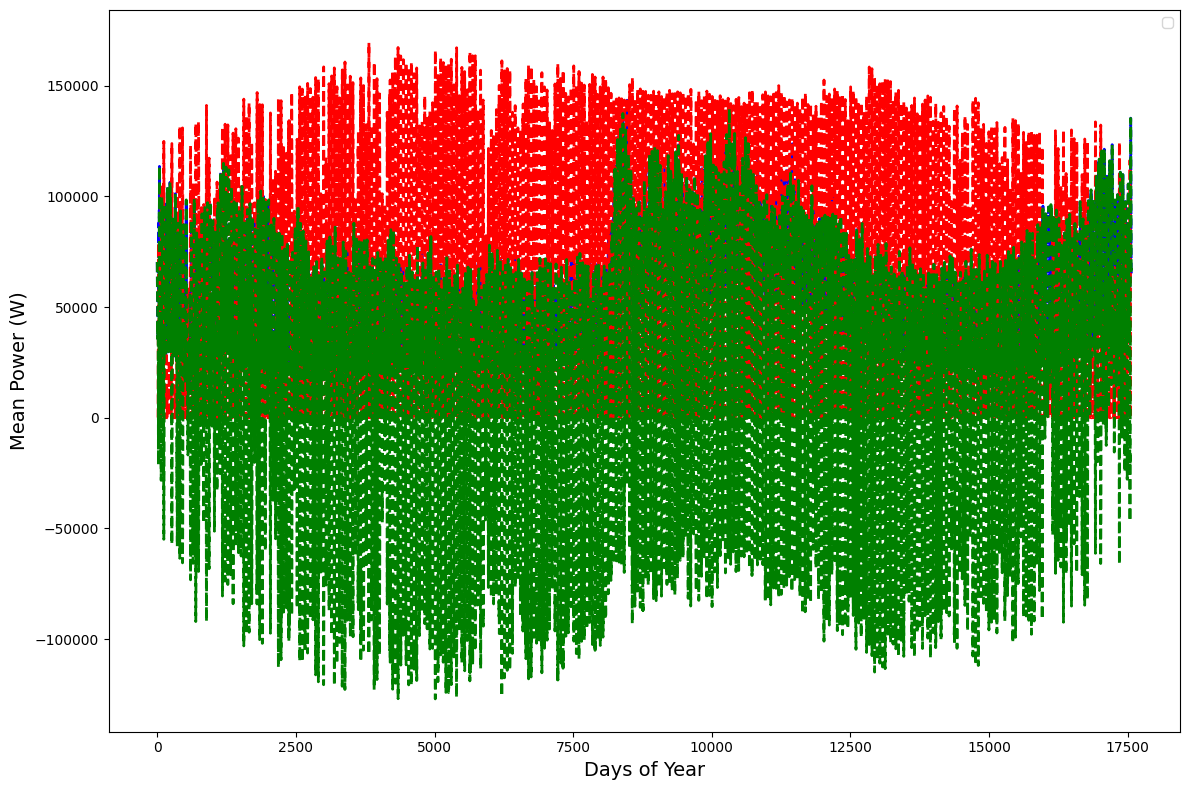

In [15]:
### Plot yearly
# Plot Prod, Cons and Net vs days
plt.figure(figsize=(12, 8))
plt.plot( yearly_avg_df['Consumption'], linestyle='--',linewidth=2, color='blue')
plt.plot( yearly_avg_df['Production'], linestyle='--',linewidth=2, color='red')
plt.plot( yearly_avg_df['NetLoad'],  linestyle='--',linewidth=2, color='green')

# Set the labels and title
plt.xlabel('Days of Year',  fontsize=14)
plt.ylabel('Mean Power (W)',  fontsize=14)
plt.legend( labels=['Consumption', 'Production', 'NetLoad'])
plt.legend()
plt.tight_layout()  # Auto-adjust layout to prevent clipping of labels

# Show the plot
plt.show()

<Axes: xlabel='month', ylabel='Consumption'>

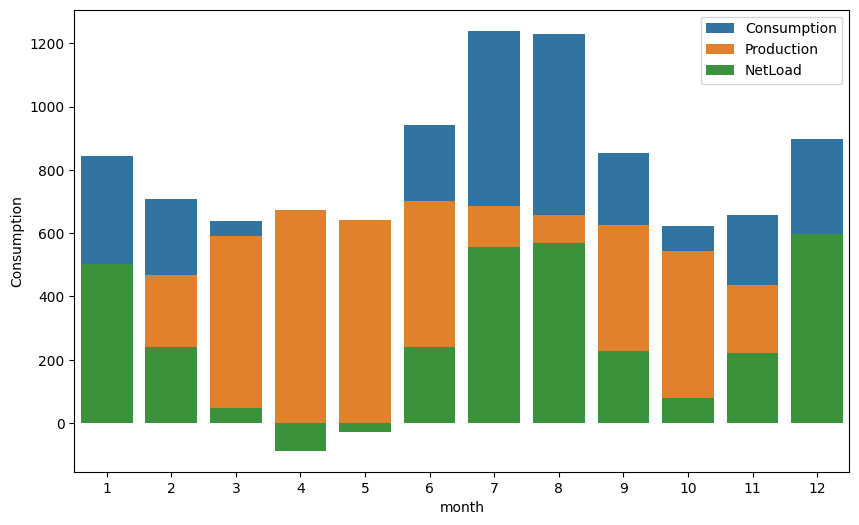

In [8]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x='month', y='Consumption', data=monthly_df, label='Consumption')
sns.barplot(x='month', y='Production', data=monthly_df, label='Production')
sns.barplot(x='month', y='NetLoad', data=monthly_df, label='NetLoad')


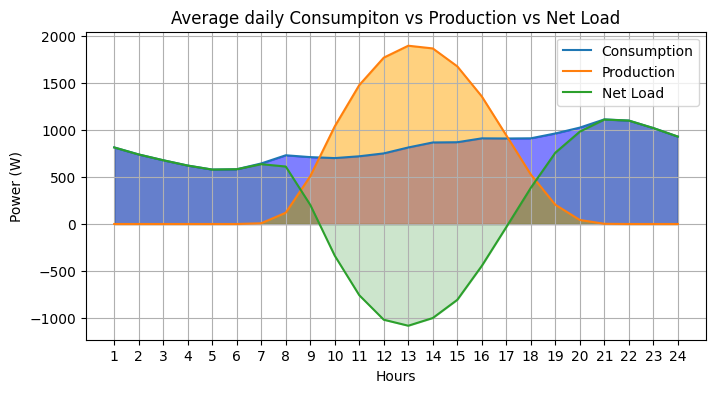

In [9]:
# Set the figure size
plt.figure(figsize=(8, 4))
hours = list(range(1, 25))

# Plot
plt.plot(hours, hourly_df['Consumption'], linestyle='-', label='Consumption')
plt.fill_between(hours, hourly_df['Consumption'], color='blue', alpha=0.5)  # Add shading under the Consumption curve

plt.plot(hours, hourly_df['Production'], linestyle='-', label='Production')
plt.fill_between(hours, hourly_df['Production'], color='orange', alpha=0.5)  # Add shading under the Production curve

plt.plot(hours, hourly_df['NetLoad'], linestyle='-', label='Net Load')
plt.fill_between(hours, hourly_df['NetLoad'], color='green', alpha=0.2)  # Add shading under the Net Load curve

# Set the labels and title
plt.xlabel('Hours'); plt.ylabel('Power (W)')
plt.title('Average daily Consumpiton vs Production vs Net Load')
plt.legend()
# Set custom x-axis tick labels
plt.xticks(hours);  plt.grid();
# Show the plot
plt.show();

In [10]:
#Plot Net load in a random week / random day
import random
random_number = random.randint(1, 52)
print("week number:",random_number)

week_nr = random_number
#plt.plot(yearly_avg_df['Consumption'].iloc[48*7*week_nr:48*7*(week_nr+1)])

# plot a week
#plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*(week_nr+1)])

# plot a day
#plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*week_nr+48])

week number: 32


# Load desired Dates


In [16]:
yearly_avg_df = yearly_avg_df.set_index('Timestamp')

In [27]:
#### Get Specific Days data
#yearly_avg_df = yearly_avg_df.set_index('Timestamp')
yearly_avg_df.index = pd.to_datetime(yearly_avg_df.index)
#yearly_agr_df.info()
#yearly_agr_df.head(10)

# Filter for ONE specific days (Example: January 1st, 2016)
#specific_days_df = yearly_avg_df.loc[yearly_avg_df.index.date == pd.to_datetime('2016-05-01').date()]
#specific_days_df = yearly_avg_df.loc[yearly_avg_df.index.date == pd.to_datetime('2016-05-01').date()]


# Create a list of dates you want to filter

desired_dates = pd.to_datetime([
    '2016-11-01' ])
'''
desired_dates = pd.to_datetime([
    '2016-07-08', '2016-07-09' ])

desired_dates = pd.to_datetime([
    '2016-07-08', '2016-07-09', '2016-07-10',
    '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14'
])
'''
# Filter the DataFrame to only include these dates
specific_days_df = yearly_avg_df.loc[yearly_avg_df.index.normalize().isin(desired_dates)]

# CHANGE HOURLY DATA TO SPECIFIC DAY
#specific_days_df.index = pd.to_datetime(specific_days_df.index)
hourly_df = specific_days_df.resample('H').mean()
#hourly_df.info()
#hourly_df.tail(20)


,Consumption
0,35471.150
1,30617.860
2,28975.510
3,26443.155
4,23410.710


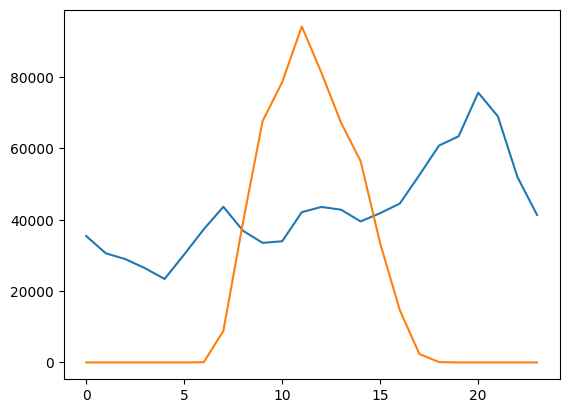

In [28]:
### Load Data #####
# For specific days
hourly_df = hourly_df.reset_index()

# For whole year
#hourly_df = yearly_avg_df.resample('H').mean().fillna(hourly_df.mean()).reset_index()

Production = hourly_df['Production']
Consumption = hourly_df['Consumption']
NetLoad =  hourly_df['NetLoad']

hours = len(Production)
timeframe = np.linspace(0,hours-1,hours)

plt.plot(Consumption)
plt.plot(Production)
Consumption.head()

# HEMS Rule-Based Load Shifting Optim
Simple Load Shifting / Load Peak Clipping
Objective:
**Minimize abs(Load + Shifted - Ppv)**

minimize peak consumption& maximise using PV generation

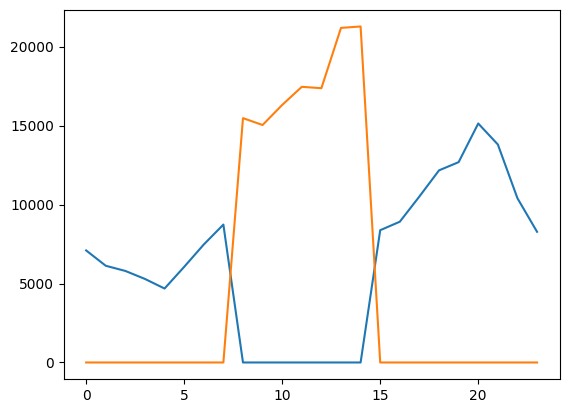

In [29]:
# Define the Rule-based controller for Load Shifting
perc = 0.2;

P_shifted_neg = 0*Consumption;  # Initialize the shifted load array
P_shifted_pos = 0*Consumption;  # Initialize the shifted load array
count = 0;
day = 0;

for i in range(len(Production)):
    if i%24==0 :
       day  +=1;
    if NetLoad[i] >= 0 and i <= 12*day:
       P_shifted_neg[i] = perc*Consumption[i]  # can shift only ~15% of load
       P_shifted_pos[i] = 0
    elif NetLoad[i] >= 0 and i > 12*day:
       P_shifted_neg[i] = perc*Consumption[i]  # can shift only ~15% of load
       P_shifted_pos[i] = 0
    else:
       P_shifted_neg[i] = 0
       P_shifted_pos[i] = P_shifted_neg[i-8] ;

# re-run the iteration to add the afternoon shifted load
day=0; # reset day to 0 and
for i in range(len(Production)):
    if i%24==0 :
       day  +=1;
    if NetLoad[i] <= 0 : # Added a condition to ensure i is greater than or equal to 16
       P_shifted_pos[i] = P_shifted_pos[i] + P_shifted_neg[i+7];


hours = len(Production)
timeframe = np.linspace(0,hours-1,hours)
plt.plot(timeframe, P_shifted_neg);
plt.plot(timeframe, P_shifted_pos);

#plt.xlim(0, 24)
#plt.xticks(np.arange(0, len(Consumption), 1))  # Adjust the step size (3 in this case)

In [30]:
print(P_shifted_neg.sum()/Consumption.sum())
print(P_shifted_pos.sum()/Consumption.sum())

0.1470700749991815
0.12046666815361404


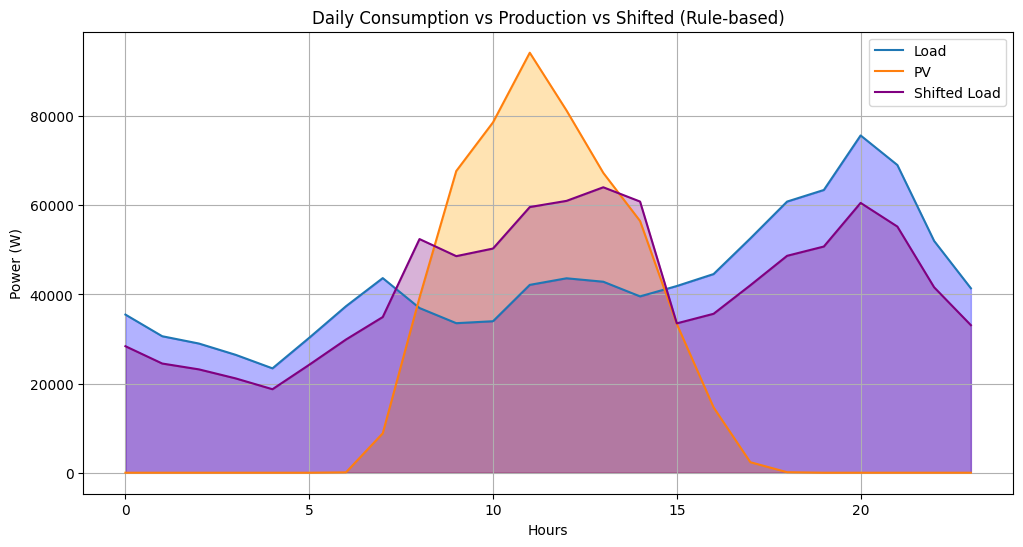

In [31]:
# update the Consumption with the Shifted load
Cons_new_df = Consumption + P_shifted_pos - P_shifted_neg

# Reset the index
#Shifted_load = Shifted_load.reset_index(drop=True)
hours = len(Production)
timeframe = np.linspace(0,hours-1,hours)

plt.figure(figsize=(12,6))
plt.plot(timeframe,Consumption, label='Load')
plt.fill_between(timeframe, Consumption, color='blue', alpha=0.3)  # Add shading under the curve

plt.plot(timeframe,Production, label='PV')
plt.fill_between(timeframe, Production, color='orange', alpha=0.3)  # Add shading

plt.plot(timeframe,Cons_new_df, label='Shifted Load', color = 'purple')
plt.fill_between(timeframe, Cons_new_df, color='purple', alpha=0.3)  # Add shading

#plt.plot(timeframe,  Cons_new_df - Production,  marker='o', label='New Net')
#plt.plot(timeframe,  Consumption - Production,  marker='o', label='Old Net')

# Set the labels and title
plt.xlabel('Hours'); plt.ylabel('Power (W)')
plt.title('Daily Consumption vs Production vs Shifted (Rule-based)')
plt.legend()
# Set custom x-axis tick labels
plt.grid();
# Show the plot
plt.show();

In [32]:
## Get the Energies
P_PV_used = []
P_PV_used_new = []
next_P_PV_used = 0
next_P_PV_used_new = 0

for i in range(hours):
    if NetLoad[i] < -1e-6:
       next_P_PV_used = Consumption[i]
       next_P_PV_used_new = Cons_new_df[i]
    else:
       next_P_PV_used = Production[i]
       next_P_PV_used_new = Production[i]
    P_PV_used.append(next_P_PV_used)  # adding the load to previous
    P_PV_used_new.append(next_P_PV_used_new)  # adding the load to previous

# Initialize DataFrame for results
results = pd.DataFrame(index=Production.index)
results['Cons_new'] = Cons_new_df
results['P_PV_used'] = P_PV_used
results['P_PV_used_new'] = P_PV_used_new
print(results['P_PV_used'].sum());
print(results['P_PV_used_new'].sum())

332018.82499999995
456108.477


In [81]:
results.to_csv('DR_optim_results.csv', index=True)


# Performance Metrics

In [22]:
# Define evaluation metrics
def system_efficiency(pv_data, load_data, results):
    # Assume that results_* DataFrame contains columns for 'Net Load', 'PV Used', 'Battery Flow'

    # Calculate total Energy metrics
    E_total_pv = pv_data.sum()       # total energy by PVs  (Wh)
    E_total_load = load_data.sum()   # total energy by Load (Wh)
    E_total_net = E_total_pv - E_total_load  # total net (Wh)

    E_used_pv = results['P_PV_used'].sum()
    E_used_pv_new = results['P_PV_used_new'].sum()
    E_wasted_pv = E_total_pv - E_used_pv    # Assuming E_used_pv is energy directly used by the load
    E_wasted_pv_new = E_total_pv - E_used_pv_new    # Assuming E_used_pv is energy directly used by the load

    # Efficiency before
    # Self Sufficiency
    SS = (( E_used_pv ) / E_total_load )*100
    # PV Self-Consumption Rate including with battery
    SC = (( E_used_pv ) / E_total_pv )*100

    # Efficiency after Peak Shifting
    # Self Sufficiency
    SS_new = ( E_used_pv_new  / E_total_load )*100
    # PV Self-Consumption Rate
    SC_new = ( E_used_pv_new  / E_total_pv ) *100

    efficiency_before_PS = {
        'Self Sufficiency Rate%': round(SS,2) ,
        'Self Consumption Rate %': round(SC,2),
    }
    efficiency_after_PS = {
        'Self Sufficiency Rate DSM%': round(SS_new,2) ,
        'Self Consumption Rate DSM%': round(SC_new,2),
    }

    return efficiency_before_PS, efficiency_after_PS


In [25]:
system_efficiency(Production, Consumption, results)

({'Self Sufficiency Rate%': 37.25, 'Self Consumption Rate %': 55.01},
 {'Self Sufficiency Rate DSM%': 48.22, 'Self Consumption Rate DSM%': 71.21})

# HEMS Optim GEKKO

In [33]:
!pip install gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 46.7 MB/s eta 0:00:00


In [38]:
from gekko import GEKKO

# Create a Gekko model
m = GEKKO(remote=False)  # Use local solving

perc = 0.2;  # Percentage % of the load transferrable
# Initial specifications
E_shifted_pos = 0.0  #
E_shifted_neg = 0.0  #
load_thres = perc*np.mean(Consumption) # determine max deferrable load threshold (~ 300W)
#load_thres = np.max(Consumption) # determine max deferrable load threshold
max_energy = perc*np.sum(Consumption);  # maximum energy that can be shifted

# Variables
P_shifted_pos = [m.Var(value=100, lb=0, ub=2*load_thres, name=f'Shifted_pos_{i}') for i in range(hours)]
P_shifted_neg = [m.Var(value=100, lb=0, ub=load_thres, name=f'Shifted_neg_{i}') for i in range(hours)]
E_shifted_pos = [m.Var(value=0, lb=0, ub=max_energy, name=f'E_shifted_pos_{i}') for i in range(hours)]
E_shifted_neg = [m.Var(value=0, lb=0, ub=max_energy, name=f'E_shifted_neg_{i}') for i in range(hours)]

# Initial
m.Equation(E_shifted_pos[0] ==  P_shifted_pos[0])
m.Equation(E_shifted_neg[0] ==  P_shifted_neg[0])

# Constraints for subsequent hours
for i in range(1, hours):
    m.Equation(E_shifted_pos[i] == E_shifted_pos[i-1] + P_shifted_pos[i])
    m.Equation(E_shifted_neg[i] == E_shifted_neg[i-1] + P_shifted_neg[i])
    #if i%24==0 :
    #   m.Equation(E_shifted_neg[i-1] ==  E_shifted_pos[i-1])

# Complementarity constraint: Charge and discharge cannot be non-zero simultaneously
for i in range(hours):
    m.Equation(P_shifted_pos[i] * P_shifted_neg[i] == 0)

# Constraint to make sure the neg energy shifted is equal to the positive
m.Equation(E_shifted_neg[hours-1] ==  E_shifted_pos[hours-1])
#m.Equation(E_shifted_neg[hours-1] ==  max_energy)

# Objective function: Minimize the absolute net load
net_load = [Consumption[i] - Production[i] + P_shifted_pos[i] - P_shifted_neg[i] for i in range(hours)]
m.Minimize(m.sum([m.abs3(net_load[i]) for i in range(hours)]))  # Using m.abs3 for absolute value

# Solve the model
# 1 = APOPT (Advanced Process OPTimizer): Good for mixed-integer nonlinear problems.
8# 2 = BPOPT: Biegler's IPOPT.
# 3 = IPOPT: Interior Point OPTimizer, good for large-scale nonlinear optimization.
m.options.SOLVER = 3  # APOPT solver for NLP
m.solve(disp=True)

# Print results
print('Charging and Discharging Schedule:')
for i in range(hours):
    print(f'Hour {i+1}: Shifted_pos = {P_shifted_pos[i].value[0]}, Shifted_neg = {P_shifted_neg[i].value[0]} , E_shifted_pos = {E_shifted_pos[i].value[0]}, E_shifted_neg = {E_shifted_neg[i].value[0]}')
    #print(f'Hour {i+1}:  E_shifted_pos = {E_shifted_pos[i].value[0]}, E_shifted_neg = {E_shifted_neg[i].value[0]}')



 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :          193
   Intermediates:            0
   Connections  :           25
   Equations    :          146
   Residuals    :          146
 
 Number of state variables:            193
 Number of total equations: -          146
 Number of slack variables: -           48
 ---------------------------------------
 Degrees of freedom       :             -1
 
 * Warning: DOF <= 0
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.11 NLPi:   10 Dpth:    0 Lvs:    0 Obj:  7.00E+05 Gap:

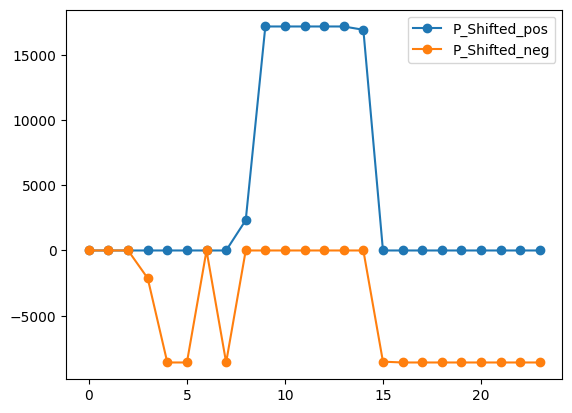

In [39]:
# Convert lists to numpy arrays
P_shifted_pos_array = np.array(P_shifted_pos).flatten()
P_shifted_neg_array = np.array(P_shifted_neg).flatten()
E_shifted_pos_array = np.array(E_shifted_pos).flatten()
E_shifted_neg_array = np.array(E_shifted_neg).flatten()

optimized_net_load = Consumption - Production + P_shifted_pos_array - P_shifted_neg_array
optimized_net_load

plt.plot(timeframe, P_shifted_pos_array,  marker='o', label='P_Shifted_pos')
plt.plot(timeframe, -P_shifted_neg_array,  marker='o', label='P_Shifted_neg')
#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')
plt.legend()
plt.show()

In [40]:
## This should be zero
max(E_shifted_pos_array) - max(E_shifted_neg_array)


0.0

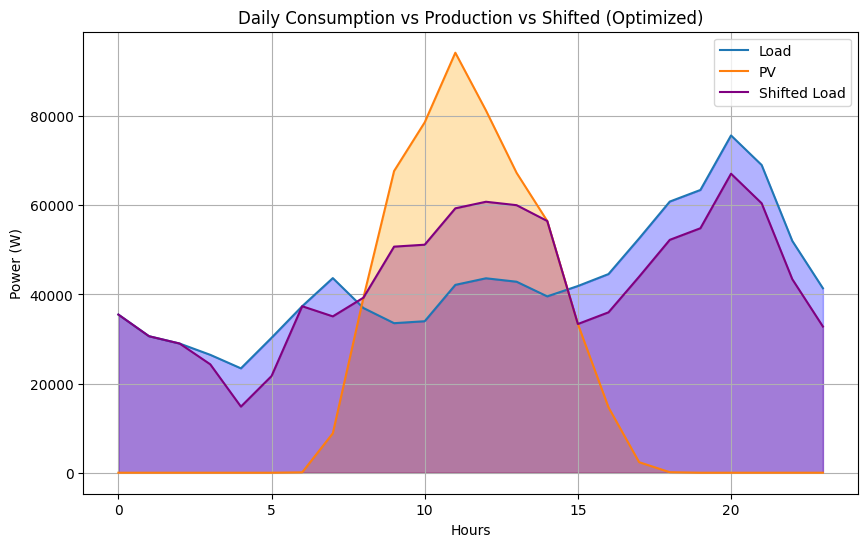

In [42]:
timeframe = np.linspace(0,hours-1,hours)
Cons_new_df = Consumption + P_shifted_pos_array - P_shifted_neg_array

# Reset the index
#Shifted_load = Shifted_load.reset_index(drop=True)
plt.figure(figsize=(10,6))

plt.plot(timeframe, Consumption, label='Load' )  #marker ='o'
plt.fill_between(timeframe, Consumption, color='blue', alpha=0.3)  # Add shading under the Consumption curve

plt.plot(timeframe,Production, label='PV',  )
plt.fill_between(timeframe, Production, color='orange', alpha=0.3)  # Add shading under the Consumption curve

plt.plot(timeframe,Cons_new_df, label='Shifted Load', color = 'purple',  )
plt.fill_between(timeframe, Cons_new_df, color='purple', alpha=0.3)  # Add shading under the Consumption curve

#plt.plot(timeframe,Cons_new_df, label='Shifted Load' )
#plt.plot(timeframe,Consumption - Production,  label='Old Net',  marker='o')
#plt.plot(timeframe,Cons_new_df - Production,  label='New Net',  marker='o')

# Set the labels and title
plt.xlabel('Hours'); plt.ylabel('Power (W)')
plt.title('Daily Consumption vs Production vs Shifted (Optimized)')
plt.legend()
# Set custom x-axis tick labels
plt.grid();
# Show the plot
plt.show();


In [36]:
# Calculate SOC over the time period
P_PV_used = []
P_PV_used_new = []
next_P_PV_used = 0
next_P_PV_used_new = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if NetLoad[i] <= 1e-6:
       next_P_PV_used = Consumption[i]
       next_P_PV_used_new = Cons_new_df[i]
    else:
       next_P_PV_used = Production[i]
       next_P_PV_used_new = Production[i]
    P_PV_used.append(next_P_PV_used)  # adding the load to previous
    P_PV_used_new.append(next_P_PV_used_new)  # adding the load to previous

results3 = pd.DataFrame(index=Production.index)
#results3['SOC'] = soc_array
results3['Net Load'] = optimized_net_load
results3['P_PV_used'] = P_PV_used
results3['P_PV_used_new'] = P_PV_used_new
results3['P_shifted_pos'] = P_shifted_pos
results3['P_shifted_neg'] = P_shifted_neg

# Round all numeric columns to two decimal places
results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results3)



    Net Load  P_PV_used  P_PV_used_new   P_shifted_pos   P_shifted_neg
0    328.967      0.000          0.000           [0.0]  [192.66784214]
1    423.211      0.000          0.000           [0.0]  [27.051861551]
2    426.110      0.000          0.000           [0.0]           [0.0]
3    388.870      0.000          0.000           [0.0]           [0.0]
4    344.275      0.000          0.000           [0.0]           [0.0]
5    319.537      0.000          0.000           [0.0]  [125.60529122]
6    355.383      1.176          1.176           [0.0]  [192.66784214]
7    322.445    131.538        131.538           [0.0]  [192.66784214]
8     -0.000    595.846        633.300  [37.454193548]           [0.0]
9   -174.761    550.064        935.399  [385.33568429]           [0.0]
10  -311.264    530.919        916.255  [385.33568429]           [0.0]
11  -409.801    643.427       1028.762  [385.33568429]           [0.0]
12  -202.802    681.432       1066.768  [385.33568429]           [0.0]
13    

<ipython-input-36-426c7225a101>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)


Save results top use later in another notebook

In [ ]:
results3.to_csv('DR_optim_results.csv', index=True)


In [ ]:
## Plot the results
#plot_results(np.linspace(0,hours-1,hours), Production, Consumption, NetLoad, results3 )

eff_without, eff_with = system_efficiency(Production, Consumption, results3 )
print("Efficiency with Optim:", eff_with)
print("Efficiency without Optim:", eff_without)

Efficiency with Optim: {'Self Sufficiency Rate DSM%': 41.09, 'Self Consumption Rate DSM%': 74.99}
Efficiency without Optim: {'Self Sufficiency Rate%': 33.35, 'Self Consumption Rate %': 60.86}


# HEMS Optimization SCipy (by Jorge B.)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 682912.8325000001
            Iterations: 42
            Function evaluations: 1104
            Gradient evaluations: 41


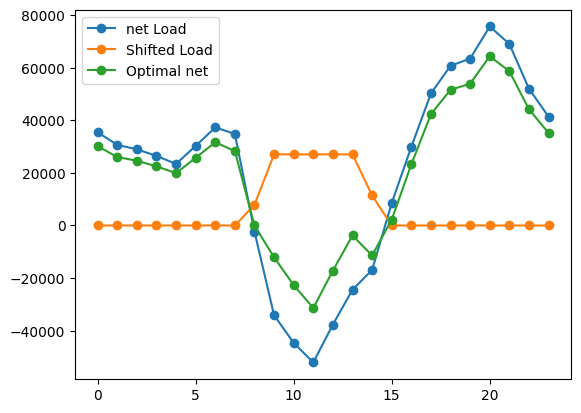

In [46]:
from scipy.optimize import minimize
from random import randrange

#randommonth=randrange(len(monthlist))
#month_num = randommonth

#randomday=randrange(max(monthlist[randommonth]['Day']))
#daily_data=monthlist[randommonth][monthlist[randommonth]['Day']==randomday]
#daily_cons=daily_data['Consumption']
#plt.plot(plothours, daily_data['Consumption'], linestyle='-', label='Daily consumption')

# Calculate the average by dividing by the number of sheets
#daily_data['Consumption'] /= sheet_count
#daily_data['Production'] /= sheet_count

perc = 0.15;

# Sample data (you should replace these with your actual data)
N =  np.array((1-perc)*Consumption)  # non-flexible load, length 48
P =  np.array(Production)  # solar panel production, length 48
maxload = np.array(np.max(Consumption)+500)  # maximum load, length 48
minload = np.array(np.min(Consumption))  # minimum load, length 48
estimated_flexibility = perc*np.sum(Consumption)  # total estimated flexibility

# Objective function to minimize the maximum absolute value of (F(t) + N(t) - P(t))
#def objective(F):
#    load_diff = F + N - P
#    return np.max(np.abs(load_diff))

#------------------------------------------------OBJECTIVE FUNCTION------------------------------------------------------
def objective(F):
    load_diff = F + N - P
    return sum(np.abs(load_diff))

#Constraints
constraints = [
    {'type': 'ineq', 'fun': lambda F: F},  # F(t) >= 0
    {'type': 'ineq', 'fun': lambda F: maxload - (F + N)},  # F(t) + N(t) <= maxload(t)
#    {'type': 'ineq', 'fun': lambda F: (F + N) - minload},  # F(t) + N(t) >= minload(t)
    {'type': 'eq', 'fun': lambda F: np.sum(F) - estimated_flexibility}]  # Sum(F) == estimated_flexibility
  #  {'type': 'eq', 'fun': lambda F: -F + np.max(N) }]  # Sum(F) == estimated_flexibility

#lower limit
#constraints = [
#    {'type': 'ineq', 'fun': lambda F: F},  # F(t) >= 0
#    {'type': 'ineq', 'fun': lambda F: (F + N) - minload},  # F(t) + N(t) >= minload(t)
#    {'type': 'eq', 'fun': lambda F: np.sum(F) - estimated_flexibility}]  # Sum(F) == estimated_flexibility

#No limits
#constraints = [
#    {'type': 'ineq', 'fun': lambda F: F},  # F(t) >= 0
#    {'type': 'eq', 'fun': lambda F: np.sum(F) - estimated_flexibility}]  # Sum(F) == estimated_flexibility

# Initial guess for F (can be zeros or any reasonable initial values)
initial_F = np.zeros(len(Consumption))

options = {'maxiter': 500, 'ftol': 1e-5, 'disp': True}
# Perform the minimization
result = minimize(objective, initial_F, constraints=constraints, options=options, method='SLSQP')


# Check if the optimization was successful
if result.success:
    optimal_F = result.x
    hours = len(P)
    timeframe = np.linspace(0,hours-1,hours)
    optimized_net = optimal_F + N - P

    plt.plot(timeframe,  N/(1-perc) -P,  marker='o', label='net Load')
    plt.plot(timeframe,  optimal_F,  marker='o', label='Shifted Load')
    plt.plot(timeframe, optimized_net,  marker='o', label='Optimal net')
    #plt.plot(plothours, monthly_data['January_weekday_maxcons'],  marker='o', label='Maximum')
    #plt.title(strmonth[randommonth]+' '+str(randomday))

    plt.legend(); plt.show()

else:
    print("Optimization failed:", result.message)

#### Set the new Consumption Load
Cons_new_df = optimized_net + P


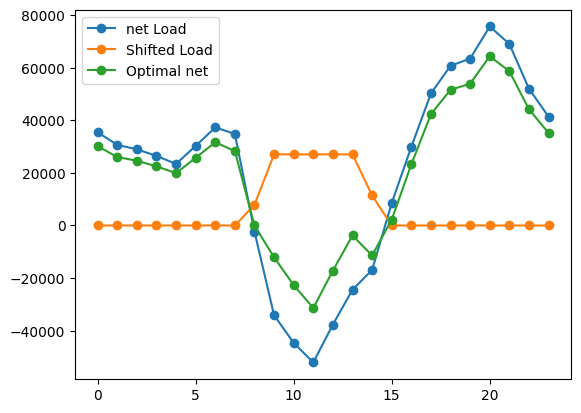

In [47]:
plt.plot(timeframe,  (N*(1/(1-perc))-P),  marker='o', label='net Load')
plt.plot(timeframe,  (optimal_F),  marker='o', label='Shifted Load')
plt.plot(timeframe, (optimized_net),  marker='o', label='Optimal net')
#plt.plot(timeframe, monthly_data['January_weekday_maxcons'],  marker='o', label='Maximum')
#plt.title(strmonth[randommonth]+' '+str(randomday))
plt.legend(); plt.show()

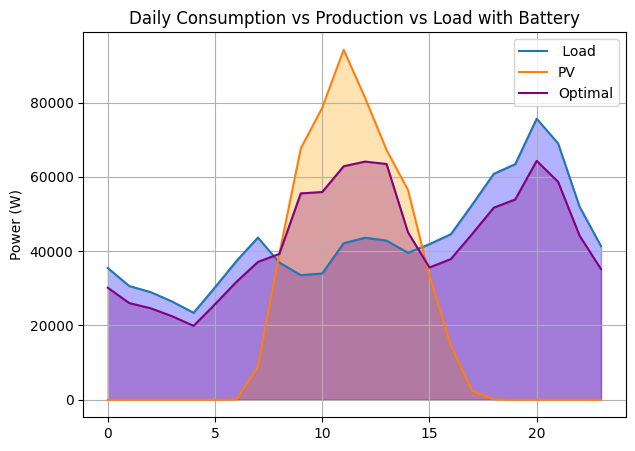

In [48]:
plt.figure(figsize=(7,5))

plt.plot(timeframe,  N/(1-perc) ,   label=' Load')
plt.fill_between(timeframe, N/(1-perc) , color='blue', alpha=0.3)  # Add shading under the curve

plt.plot(timeframe,   P ,   label='PV')
plt.fill_between(timeframe,  P ,  color='orange', alpha=0.3)  # Add shading

plt.plot(timeframe, Cons_new_df,   label='Optimal', color = 'purple')
plt.fill_between(timeframe, Cons_new_df , color = 'purple', alpha=0.3)  # Add shading

#plt.title(strmonth[randommonth]+' '+str(randomday))

plt.ylabel('Power (W)')
plt.title('Daily Consumption vs Production vs Load with Battery')
plt.legend()
# Set custom x-axis tick labels
plt.grid();
# Show the plot
#plt.xticks(rotation=45)
plt.show();

In [ ]:
# Calculate SOC over the time period
P_PV_used = []
P_PV_used_new = []
next_P_PV_used = 0
next_P_PV_used_new = 0

for i in range(hours):
    if NetLoad[i] <= 1e-6:
       next_P_PV_used = Consumption[i]
       next_P_PV_used_new = Cons_new_df[i]
    else:
       next_P_PV_used = Production[i]
       next_P_PV_used_new = Production[i]
    P_PV_used.append(next_P_PV_used)  # adding the load to previous
    P_PV_used_new.append(next_P_PV_used_new)  # adding the load to previous

results4 = pd.DataFrame(index=Production.index)
results4['Net Load'] = optimized_net
results4['P_PV_used'] = P_PV_used
results4['P_PV_used_new'] = P_PV_used_new
results4['Flexible_load'] = optimal_F

# Round all numeric columns to two decimal places
results4 = results4.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results4)

    Net Load  P_PV_used  P_PV_used_new  Flexible_load
0    443.389      0.000          0.000          0.000
1    382.723      0.000          0.000          0.000
2    362.194      0.000          0.000          0.000
3    330.539      0.000          0.000          0.000
4    292.634      0.000          0.000          0.000
5    378.371      0.000          0.000          0.000
6    465.667      1.176          1.176          0.000
7    418.115    131.538        131.538          0.000
8     -0.007    595.846        633.294        126.825
9   -256.584    550.064        853.577        386.023
10  -390.215    530.919        837.304        386.023
11  -505.628    643.427        932.936        386.023
12  -304.330    681.432        965.240        386.023
13   -88.422    659.110        946.266        386.023
14   -85.934    590.334        756.859        255.075
15    33.036    502.258        502.258          0.000
16   343.273    217.577        217.577          0.000
17   622.243     34.732     

<ipython-input-33-9dba0883a6cd>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results4 = results4.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)


In [ ]:
eff_without, eff_with = system_efficiency(Production, Consumption, results4 )
print("Efficiency with Optim:", eff_with)
print("Efficiency without Optim:", eff_without)

Efficiency with Optim: {'Self Sufficiency Rate DSM%': 44.21, 'Self Consumption Rate DSM%': 80.69}
Efficiency without Optim: {'Self Sufficiency Rate%': 33.35, 'Self Consumption Rate %': 60.86}


# Battery Parameters

Battery Data
 https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf

https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf


In [41]:
# Specify battery Parameters. Source
# https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf

battery_capacity = 0.95*4600  # in Wh
max_charge_rate = 2800  # Max charge rate in W (power)
max_discharge_rate = 0.95*4000  # Max discharge rate in W (power)
soc_min = 0.1*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery


'''
# LG Resus 10H type-C
#https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf
battery_capacity = 0.95*9800  # in Wh
max_charge_rate = 5000  # Max charge rate in W (power)
max_discharge_rate = 0.5*7000  # Max discharge rate in W (power)
soc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery
'''


'\n# LG Resus 10H type-C\n#https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf\nbattery_capacity = 0.95*9800  # in Wh\nmax_charge_rate = 5000  # Max charge rate in W (power)\nmax_discharge_rate = 0.5*7000  # Max discharge rate in W (power)\nsoc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%\nbattery_soc = soc_min  # Initial state of charge in Wh\neff = 0.98;  # Charge/discharge Efficiency of the battery\n'

# Define PLOT functions

In [65]:
#%%writefile energy_data_plotter.py
#class EnergyDataPlotter:
#    def __init__(self):
#        # Initialize with any required variables or setups
#        pass

def plot_results( timeframe, pv_data, load_data, load_new, netload_no_bat, results ):

    Cons_new_bat = load_new + results['Charging']- results['Discharging']

    plt.figure(figsize=(6, 12))
    #plt.figure(figsize=(6, 8))
    plt.subplot(3, 1, 1)
    plt.plot(timeframe, load_data  ,label='Load Consumption (W)')
    plt.fill_between(timeframe, load_data, color='blue', alpha=0.3)  # Add shading under the curve
    plt.plot(timeframe, pv_data , label='PV Generation (W)')
    plt.fill_between(timeframe, pv_data, color='orange', alpha=0.3)
    plt.plot(timeframe, load_new ,  color='purple', label='Optim DR Load (W)')
    plt.fill_between(timeframe, load_new, color='purple', alpha=0.3)
    plt.plot(timeframe, Cons_new_bat, color = 'brown', label='Optim DR & battery (W)' )
    plt.fill_between(timeframe, Cons_new_bat, color='brown',   alpha=0.3)

    plt.legend(loc = 'upper left', fontsize=9)
    plt.title('PV Generation vs Load Consumption');     plt.grid()
    #plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    plt.plot(timeframe, results['SOC'],  color='darkorange', linestyle='-', label='Battery SOC (Wh)')
    plt.plot(timeframe, results['Charging']-results['Discharging'] ,  color='tab:blue' ,linestyle='-.',  label='power flow (W)' )
    plt.legend(loc = 'upper left', fontsize=9)
    #plt.title('State of Charge of the Battery');
    plt.title('a)');
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(timeframe, netload_no_bat, color='green', linestyle='-', label='Net Load before DR (W)')
    plt.plot(timeframe, load_new - pv_data , color='red',  linestyle='-', label='Net Load After DR (W)')
    plt.plot(timeframe, results['Net Load'] , color='black', linestyle='-', label='Net Load After Bat (W)')
    #linestyle='dashed'

    plt.legend(loc = 'upper left', fontsize=9)
    #plt.title('Net Load') ;
    plt.title('b)') ;
    plt.grid()
    plt.xlabel('Hour of day', fontsize=12)

    plt.tight_layout()
    #plt.xticks(rotation=45)
    plt.show()

#plot_results(hourly_df['Timestamp'], Production, Consumption, NetLoad, results )


In [50]:
def plot_results2( timeframe, pv_data, load_data, load_new, netload_no_bat, results ):
    plt.figure(figsize=(8, 6))

    # update the Consumption with the Shifted load
    Cons_new_bat = load_new + results['Charging']- results['Discharging']
    # Reset the index
    #Shifted_load = Shifted_load.reset_index(drop=True)
    #hours = len(pv_data)
    #timeframe = np.linspace(0,hours-1,hours)

    plt.plot(timeframe,load_data, label='Load')
    plt.fill_between(timeframe, load_data, color='blue', alpha=0.3)  # Add shading under the curve

    plt.plot(timeframe,pv_data, label='PV')
    plt.fill_between(timeframe, pv_data, color='orange', alpha=0.3)

    plt.plot(timeframe, load_new, label='Optimized load', color = 'purple')
    plt.fill_between(timeframe, load_new, color='purple', alpha=0.3)

    plt.plot(timeframe, Cons_new_bat,  label='Optimized with battery', color = 'brown')
    plt.fill_between(timeframe, Cons_new_bat, color='brown',   alpha=0.3)

    #plt.plot(timeframe,  Cons_new_bat - pv_data,  marker='o', label='New Net')
    #plt.plot(timeframe,  load_data - pv_data,  marker='o', label='Old Net')

    # Set the labels and title
    plt.xlabel('Time (hours)');
    plt.ylabel('Power (W)')
    plt.title('Daily Consumption vs Production vs Load with Battery')
    plt.legend()
    # Set custom x-axis tick labels
    plt.grid();
    # Show the plot
    plt.xticks(rotation=45)
    plt.show();

#plot_results2(hourly_df['Timestamp'], Production, Consumption, NetLoad, results )


# Define efficiency metrics

In [45]:
# Define evaluation metrics
def system_efficiency_bat(pv_data, load_data, results_bat, results_no_bat):
    # Assume that results_* DataFrame contains columns for 'Net Load', 'PV Used', 'Battery Flow'
    # Make temporary local variables to estimate
    charge_from_PV = results_bat['Charging'].copy()
    discharge_from_PV = results_bat['Discharging'].copy()
    Power_PV_used = results_bat['P_PV_used'].copy();

    # Calculate Charge/discharge only from PV, and not from the grid!
    for i in range(len(results_bat)):
        if results_no_bat.at[i, 'NetLoad'] >= 0:
           charge_from_PV.at[i] = 0
        else:
           discharge_from_PV.at[i] = 0;

    # Calculate total Energy metrics
    E_total_pv = pv_data.sum()       # total energy by PVs  (Wh)
    E_total_load = load_data.sum()   # total energy by Load (Wh)
    E_total_net = E_total_pv - E_total_load  # total net (Wh)

    #E_bat = 0.5*(abs(results['Net Load'] - NetLoad)).sum()
    #E_bat = max(results_bat['SOC'])         # Assuming max SOC as total energy stored in battery
    #E_charging = results_bat['Charging'].sum()
    #E_discharging = results_bat['Discharging'].sum()
    E_charging = charge_from_PV.sum()
    E_discharging = discharge_from_PV.sum()
    E_used_pv = Power_PV_used.sum()
    E_wasted_pv = E_total_pv - E_used_pv    # Assuming E_used_pv is energy directly used by the load

    # Efficiency with battery
    # Self Sufficiency with battery
    SS_bat = (( E_used_pv +  E_discharging ) / E_total_load )*100
    # PV Self-Consumption Rate including with battery
    SC_bat = (( E_used_pv + E_charging ) / E_total_pv )*100
    # Load Coverage
    #net_load_clipped = results_bat['Net Load'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    #LC_bat = (1 - (net_load_clipped / E_total_load)) * 100

    # Efficiency without battery
    # Self Sufficiency withoutbattery
    SS_no_bat = ( E_used_pv  / E_total_load )*100
    # PV Self-Consumption Rate
    SC_no_bat = ( E_used_pv  / E_total_pv ) *100
    # Load Coverage
    #net_no_battery = results_no_bat['NetLoad'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    #LC_no_bat = (1 - (net_no_battery / E_total_load)) * 100

    efficiency_with_battery = {
        'Self Suff Rate%': round(SS_bat,2) ,
        'Self Cons Rate %':  round(SC_bat,2),
       # 'Load Coverage Ratio %': round(LC_bat ,2 )
    }
    efficiency_without_battery = {
        'Self Suff Rate%': round(SS_no_bat,2) ,
        'Self Cons Rate %': round(SC_no_bat,2),
       # 'Load Coverage Ratio %': round(LC_no_bat ,2)
    }

    return efficiency_with_battery, efficiency_without_battery




# Optimize Battery (GEKKO, APOPT)

In [44]:
!pip install gekko

In [46]:
from gekko import GEKKO

# Create a Gekko model
m = GEKKO(remote=False)  # Use local solving

# Battery specifications
initial_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # round trip Efficiency of the battery

# Variables & Bounds
charge = [m.Var(value=0, lb=0, ub=max_charge_rate, name=f'charge_{i}') for i in range(hours)]
discharge = [m.Var(value=0, lb=0, ub=max_discharge_rate, name=f'discharge_{i}') for i in range(hours)]
soc = [m.Var(value=initial_soc, lb=soc_min, ub=battery_capacity, name=f'soc_{i}') for i in range(hours)]
# add Bat_capacity as variable
#Cbat = [m.Var(value=battery_capacity, lb=4000, ub=12000, name=f'Cbat_{i}') for i in range(hours)]

# Initial state of charge
m.Equation(soc[0] == initial_soc + eff*charge[0] - eff*discharge[0])

# State of charge constraints for subsequent hours
for i in range(1, hours):
    m.Equation(soc[i] == soc[i-1] + eff*charge[i] - eff*discharge[i])

# Complementarity constraint: Charge and discharge cannot be non-zero simultaneously
for i in range(hours):
    m.Equation(charge[i] * discharge[i] == 0)

'''
# Battery cannot charge/discharge from/to the Grid
for i in range(hours):
    if NetLoad[i]>=0:
        m.Equation(charge[i] == 0)
    else:
        m.Equation(discharge[i] == 0)
'''

#  constraint: Charging cannot exceed production
#for i in range(hours):
#    m.Equation(eff*charge[i] + Consumption[i] <= Production[i]);

# Objective function: Minimize the absolute net load
#net_load = [Consumption[i] - Production[i] + eff*charge[i] - eff*discharge[i] for i in range(hours)]
net_load = [Cons_new_df[i] - Production[i] + eff*charge[i] - eff*discharge[i] for i in range(hours)]
m.Minimize(m.sum([m.abs3(net_load[i]) for i in range(hours)]))  # Using m.abs3 for absolute value

# include variable tariffs.
#m.Minimize(m.sum([tariffs[i]*m.abs3(net_load[i]) for i in range(hours)]))

'''
# include variable tariffs: The obj is only for positive Net Load
objective = m.Intermediate(0)
for i in range(hours):
    net_load = m.Intermediate(Consumption[i] - Production[i] + eff * charge[i] - eff * discharge[i])
    if NetLoad[i] >= 0:
        objective += tariffs[i] * m.abs3(net_load) # optimise cost when we consume
    else:
        #objective +=  m.abs3(net_load) # optimize SC when we have extra PV
        objective += tariffs[i] * m.abs3(net_load)
m.Minimize(objective)
'''

# Solve the model
# 1 = APOPT (Advanced Process OPTimizer): Good for mixed-integer nonlinear problems.
# 2 = BPOPT: Biegler's IPOPT.
# 3 = IPOPT: Interior Point OPTimizer, good for large-scale nonlinear optimization.
m.options.SOLVER = 3  # APOPT solver for NLP
m.solve(disp=True)

# Print results
print('Charging and Discharging Schedule:')
for i in range(hours):
    print(f'Hour {i+1}: Charge = {round(charge[i].value[0])}, Discharge = {round(discharge[i].value[0])}, SOC = {round(soc[i].value[0])}')


 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :          169
   Intermediates:            0
   Connections  :           25
   Equations    :          121
   Residuals    :          121
 
 Number of state variables:            169
 Number of total equations: -          121
 Number of slack variables: -           48
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.01 NLPi:    3 Dpth:    0 Lvs:    0 Obj:  6.97E+03 Gap:  0.00E+00
 Successfu

In [47]:
# Convert lists to numpy arrays
charge_array = np.array(charge).flatten()
discharge_array = np.array(discharge).flatten()
soc_array = np.array(soc).flatten()

optimized_net_load = Cons_new_df - Production + charge_array - discharge_array
#optimized_net_load

'''
plt.plot(timeframe, charge_array,  marker='o', label='charge')
plt.plot(timeframe, -discharge_array,  marker='o', label='discharge')
#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')
plt.legend()
plt.show()
'''

"\nplt.plot(timeframe, charge_array,  marker='o', label='charge')\nplt.plot(timeframe, -discharge_array,  marker='o', label='discharge')\n#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')\nplt.legend()\nplt.show()\n"

In [51]:
# Calculate SOC over the time period
P_PV_used = []
next_P_PV_used = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if NetLoad[i] <= 0:
       next_P_PV_used = Cons_new_df[i]
    else:
       next_P_PV_used = Production[i]
    P_PV_used.append(next_P_PV_used)

results3 = pd.DataFrame(index=Production.index)
results3['SOC'] = soc_array
results3['Net Load'] = optimized_net_load
results3['P_PV_used'] = P_PV_used
results3['Charging'] = charge_array
results3['Discharging'] = discharge_array

# Round all numeric columns to two decimal places
results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results3)

         SOC  Net Load  P_PV_used  Charging  Discharging
0    437.000   443.389      0.000     0.000        0.000
1    437.000   382.723      0.000     0.000        0.000
2    437.000   362.194      0.000     0.000        0.000
3    437.000   330.539      0.000     0.000        0.000
4    437.000   292.634      0.000     0.000        0.000
5    437.000   378.371      0.000     0.000        0.000
6    437.000   465.667      1.176     0.000        0.000
7    437.000   418.115    131.538     0.000        0.000
8    437.007     0.000    633.294     0.007        0.000
9    693.590     5.236    853.577   261.820        0.000
10  1083.805     7.964    837.304   398.178        0.000
11  1589.433    10.319    932.936   515.947        0.000
12  1893.763     6.211    965.240   310.541        0.000
13  1982.185     1.805    946.266    90.226        0.000
14  2068.119     1.754    756.859    87.688        0.000
15  2068.119    33.036    502.258     0.000        0.000
16  2068.119   343.273    217.5

<ipython-input-51-20830568dad1>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)


# Rule-Based charge model (self-consumption)
Simple Battery model.
Objective:
**Minimize abs(NetLoad)**
= minimize peak consumption & maximise using PV generation

In [ ]:
# Define the Rule-based controller for charging-discharging the battery

def simulate_battery_operation(pv, load, soc, capacity, charge_rate, discharge_rate, P_PV_used):
    dod = 0.1*battery_capacity
    net_load = load - pv  # Negative if excess PV

    if net_load < 0 :  # Charge when we have Excess PV
        charge_power = 0.98*min(-net_load, charge_rate, capacity - soc)
        soc += charge_power  # Charge the battery
        P_PV_used += load
        #net_load = 0  # Set net load to zero since it's handled by PV and battery
        net_load += charge_power  #
        discharge_power = 0

    else :  # If Net Load possitive
        discharge_power = 0.98*min(net_load, discharge_rate, soc )
        if soc <= 1.5*dod:              # Min SOC is at DoD
           discharge_power = 0
           soc = dod;

        soc -= discharge_power  # Discharge the battery
        P_PV_used += pv
        net_load -= discharge_power  # Reduce net load by the discharged amount
        charge_power = 0

    return soc, net_load , P_PV_used, charge_power, discharge_power

In [ ]:
# Initialize DataFrame for results
results = pd.DataFrame(index=Production.index)
results['PV'] = Production
results['Load'] = Consumption
results['SOC'] = soc_min
results['P_PV_used'] = 0
results['Net Load'] = 0
results['Timestamp'] = hourly_df['Timestamp'].copy()


# Run simulation
for i in results.index:
    battery_soc, net_load, P_PV_used,charge_power, discharge_power = simulate_battery_operation(results.at[i, 'PV'],
                                                                  results.at[i, 'Load'],
                                                                  battery_soc,
                                                                  battery_capacity,
                                                                  max_charge_rate,
                                                                  max_discharge_rate,
                                                                  results.at[i, 'P_PV_used'])
    results.at[i, 'SOC'] = battery_soc
    results.at[i, 'Net Load'] = net_load
    results.at[i, 'P_PV_used'] = P_PV_used
    results.at[i, 'Charging'] = charge_power
    results.at[i, 'Discharging'] = discharge_power


<ipython-input-100-5896be6adc44>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '521.6345588235295' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[i, 'Net Load'] = net_load
<ipython-input-100-5896be6adc44>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.1763235294117647' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[i, 'P_PV_used'] = P_PV_used


In [ ]:
results.info()
results.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PV           24 non-null     float64       
 1   Load         24 non-null     float64       
 2   SOC          24 non-null     float64       
 3   P_PV_used    24 non-null     float64       
 4   Net Load     24 non-null     float64       
 5   Timestamp    24 non-null     datetime64[ns]
 6   Charging     24 non-null     float64       
 7   Discharging  24 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.6 KB


,PV,Load,SOC,P_PV_used,Net Load,Timestamp,Charging,Discharging
0,0.000000,521.634559,437.000000,0.000000,521.634559,2016-11-01 00:00:00,0.000000,0.000000
1,0.000000,450.262647,437.000000,0.000000,450.262647,2016-11-01 01:00:00,0.000000,0.000000
2,0.000000,426.110441,437.000000,0.000000,426.110441,2016-11-01 02:00:00,0.000000,0.000000
3,0.000000,388.869926,437.000000,0.000000,388.869926,2016-11-01 03:00:00,0.000000,0.000000
4,0.000000,344.275147,437.000000,0.000000,344.275147,2016-11-01 04:00:00,0.000000,0.000000
5,0.000000,445.142500,437.000000,0.000000,445.142500,2016-11-01 05:00:00,0.000000,0.000000
6,1.176324,549.227500,437.000000,1.176324,548.051176,2016-11-01 06:00:00,0.000000,0.000000
7,131.538152,646.650731,437.000000,131.538152,515.112579,2016-11-01 07:00:00,0.000000,0.000000
8,633.300484,595.846290,473.705110,595.846290,-0.749084,2016-11-01 08:00:00,36.705110,0.000000
9,1110.160616,550.063755,1022.600033,550.063755,-11.201937,2016-11-01 09:00:00,548.894923,0.000000


# Results and plots

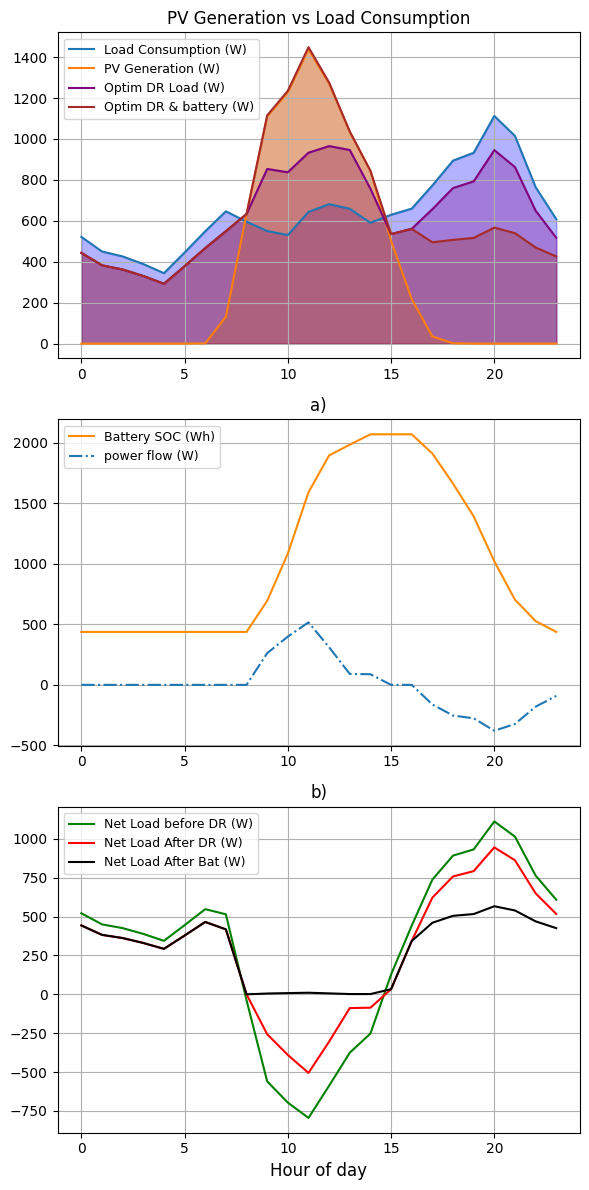

Efficiency with Battery: {'Self Suff Rate%': 55.01, 'Self Cons Rate %': 100.39}
Efficiency without Battery: {'Self Suff Rate%': 44.21, 'Self Cons Rate %': 80.69}


In [66]:
'''
# Rule based results
plot_results(hourly_df['Timestamp'], Production, Consumption, Cons_new_df, NetLoad, results )
eff_with, eff_without = system_efficiency_bat(Production, Cons_new_df, results , hourly_df)
'''

# Optimization resutls
hours_of_day = list(range(24))
plot_results(hours_of_day, Production, Consumption, Cons_new_df, NetLoad, results3 )
#plot_results(hourly_df['Timestamp'], Production, Consumption, Cons_new_df, NetLoad, results3 )
eff_with, eff_without = system_efficiency_bat(Production, Cons_new_df, results3 , hourly_df)

print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)


In [ ]:
#plot_results2(hourly_df['Timestamp'], Production, Consumption, Cons_new_df, NetLoad, results3 )

'''
cost_with , cost_without = tariff_costs( results3 ,hourly_df )
print("Cost with Battery $:",round(cost_with,2))
print("Cost without Battery $:",round(cost_without,2))
print("Saved $:",round(cost_without-cost_with,2))
'''

'\ncost_with , cost_without = tariff_costs( results3 ,hourly_df )\nprint("Cost with Battery $:",round(cost_with,2))\nprint("Cost without Battery $:",round(cost_without,2))\nprint("Saved $:",round(cost_without-cost_with,2))\n'

In [ ]:
#plot_soc1( hourly_df['Timestamp'] , results3 )